In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
from scipy.stats import gaussian_kde
sns.set_context('poster')
sns.set_palette('colorblind')

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
ati = ati[ati.eye_flag != 3]
kics = ati.KIC.values
print(f'Working with {len(ati)} stars')

Working with 94 stars


## Model Plots & Cuts

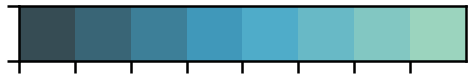

In [3]:
from matplotlib.colors import ListedColormap
snsmap = sns.color_palette('GnBu_d',8)
cmap = ListedColormap(snsmap.as_hex())
sns.palplot(snsmap)

## Comp

In [4]:
stan = pd.read_hdf('../data/jvs_models/standard_population.h5', key='sample', mode='r')
ro = pd.read_hdf('../data/jvs_models/rocrit_population.h5', key='sample', mode='r')

In [5]:
print(stan.columns)
print(ro.columns)

Index(['mass', 'Teff', 'logg', 'age', 'log(L/Lsun)', 'kepmag', 'period',
       '[Fe/H]', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', '2mass_j', '2mass_h',
       '2mass_k', 'distmod', 'av'],
      dtype='object')
Index(['mass', 'Teff', 'logg', 'age', 'log(L/Lsun)', 'kepmag', 'period',
       '[Fe/H]', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', '2mass_j', '2mass_h',
       '2mass_k', 'distmod', 'av'],
      dtype='object')


In [6]:
old_stan = pd.read_csv('../data/jvs_models/standard_model.csv', index_col=None)
old_stan.rename(columns={'# Teff(K)':'Teff', ' Prot(days)':'period',
                         ' Age(Gyr)':'Age',' Mass(Msun)':'M', ' Ro ':'Ro'}, inplace=True)
old_ro = pd.read_csv('../data/jvs_models/rocrit_model.csv', index_col=None)
old_ro.rename(columns={'#Teff(K)':'Teff', ' Prot(days)':'period',
                         ' Age(Gyr)':'Age',' Mass(Msun)':'M', ' Ro ':'Ro'}, inplace=True)

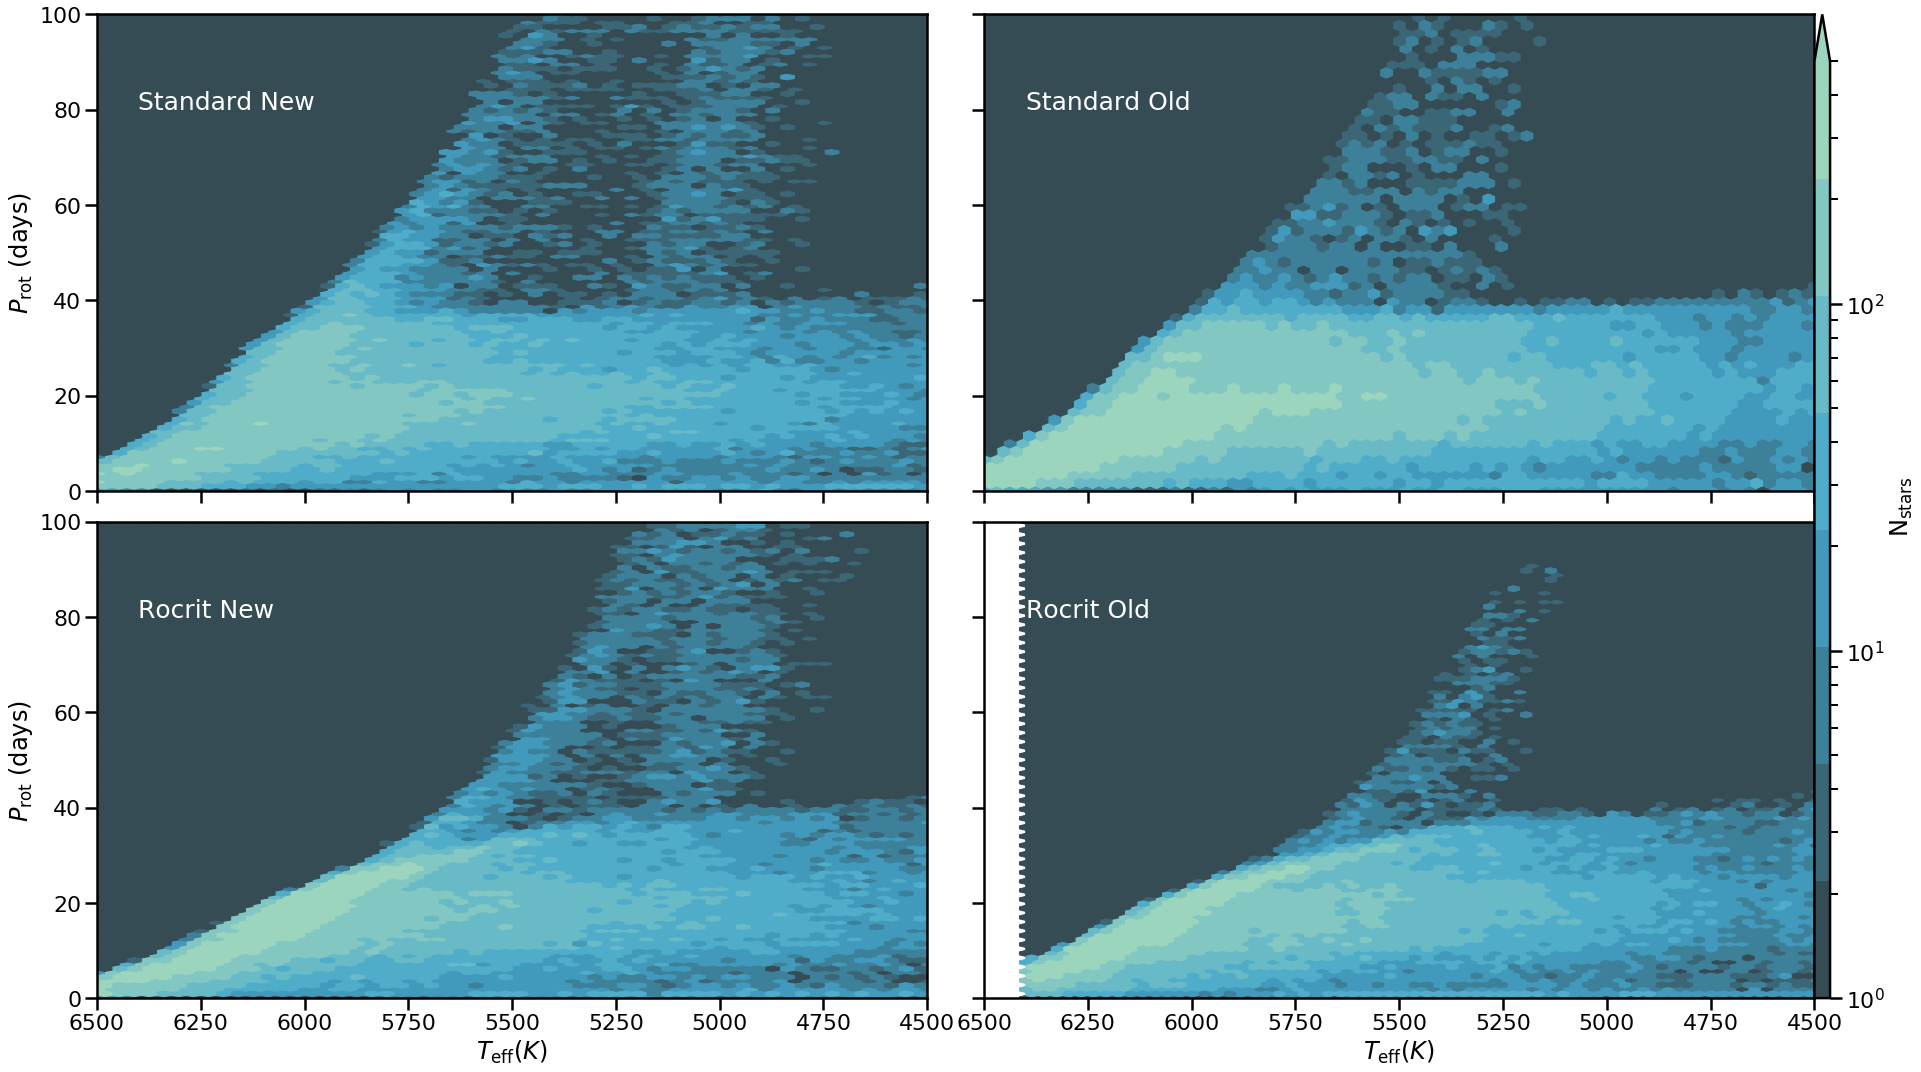

In [8]:
fig, axes = plt.subplots(2,2, figsize=(30,15), sharex=True, sharey=True)

axes[0,0].hexbin(stan.Teff, stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,0].text(6400, 80, s='Standard New', c='w', fontsize=25)
axes[0,1].hexbin(old_stan.Teff, old_stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,1].text(6400, 80, s='Standard Old', c='w', fontsize=25)
axes[1,0].hexbin(ro.Teff, ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,0].text(6400, 80, s='Rocrit New', c='w', fontsize=25)
c = axes[1,1].hexbin(old_ro.Teff, old_ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,1].text(6400, 80, s='Rocrit Old', c='w', fontsize=25)

for ax in axes.ravel():
    ax.invert_xaxis()
    ax.set_ylim(0, 100)
    ax.set_xlim(6500, 4500)

axes[0,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_xlabel(r'$T_{\rm eff} (K)$')
axes[1,1].set_xlabel(r'$T_{\rm eff} (K)$')
fig.tight_layout()
fig.colorbar(c,ax=axes.ravel(), label=r'$\rm{N_{\rm stars}}$', pad=0,aspect=60, extend='max')
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/model_comparison.png', bbox_inches='tight', dpi=300)
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/model_comparison.pdf', bbox_inches='tight', rasterized=True)
plt.show()

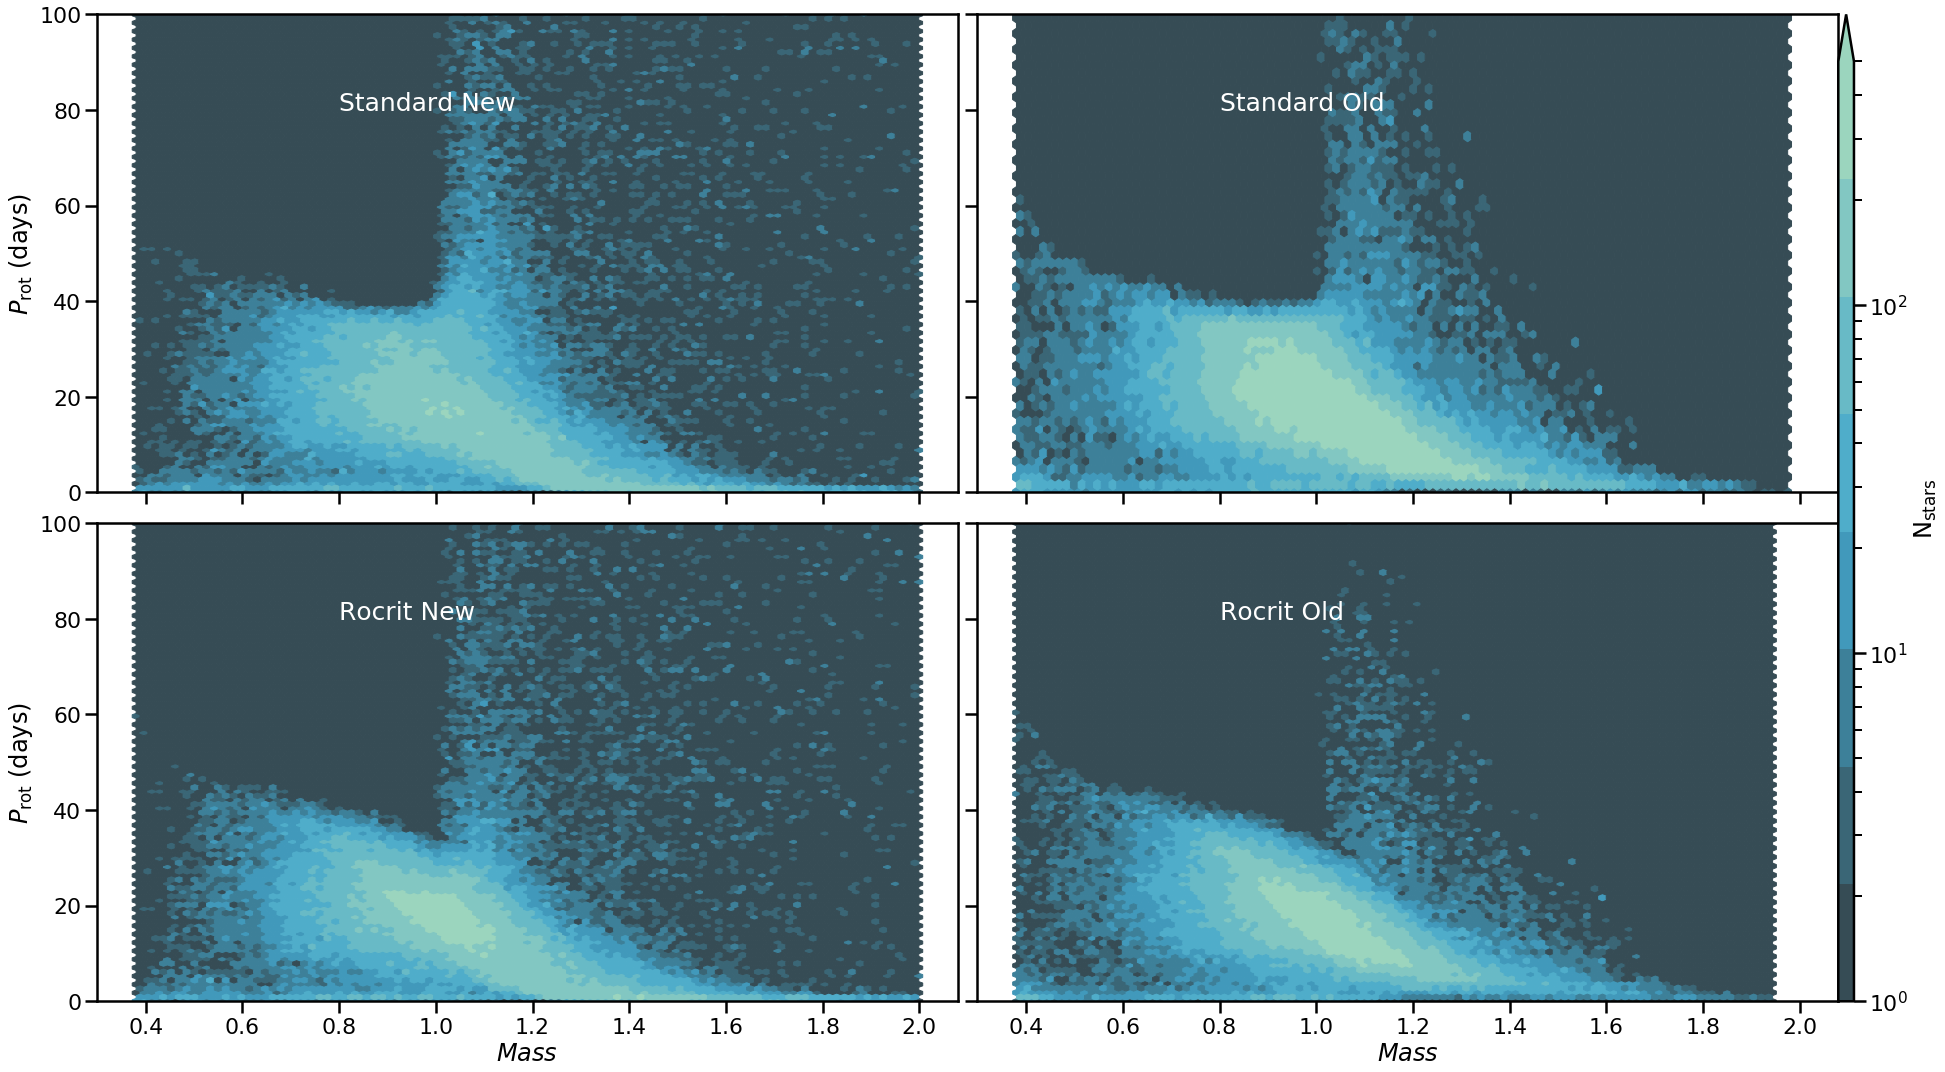

In [9]:
fig, axes = plt.subplots(2,2, figsize=(30,15), sharex=True, sharey=True)

axes[0,0].hexbin(stan.mass, stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,0].text(0.8, 80, s='Standard New', c='w', fontsize=25)
axes[0,1].hexbin(old_stan.M, old_stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,1].text(0.8, 80, s='Standard Old', c='w', fontsize=25)
axes[1,0].hexbin(ro.mass, ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,0].text(0.8, 80, s='Rocrit New', c='w', fontsize=25)
c = axes[1,1].hexbin(old_ro.M, old_ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,1].text(0.8, 80, s='Rocrit Old', c='w', fontsize=25)

for ax in axes.ravel():
    ax.invert_xaxis()
    ax.set_ylim(0, 100)
#     ax.set_xlim(6500, 4500)

axes[0,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_xlabel(r'$Mass$')
axes[1,1].set_xlabel(r'$Mass$')
fig.tight_layout()
fig.colorbar(c,ax=axes.ravel(), label=r'$\rm{N_{\rm stars}}$', pad=0,aspect=60, extend='max')
plt.show()

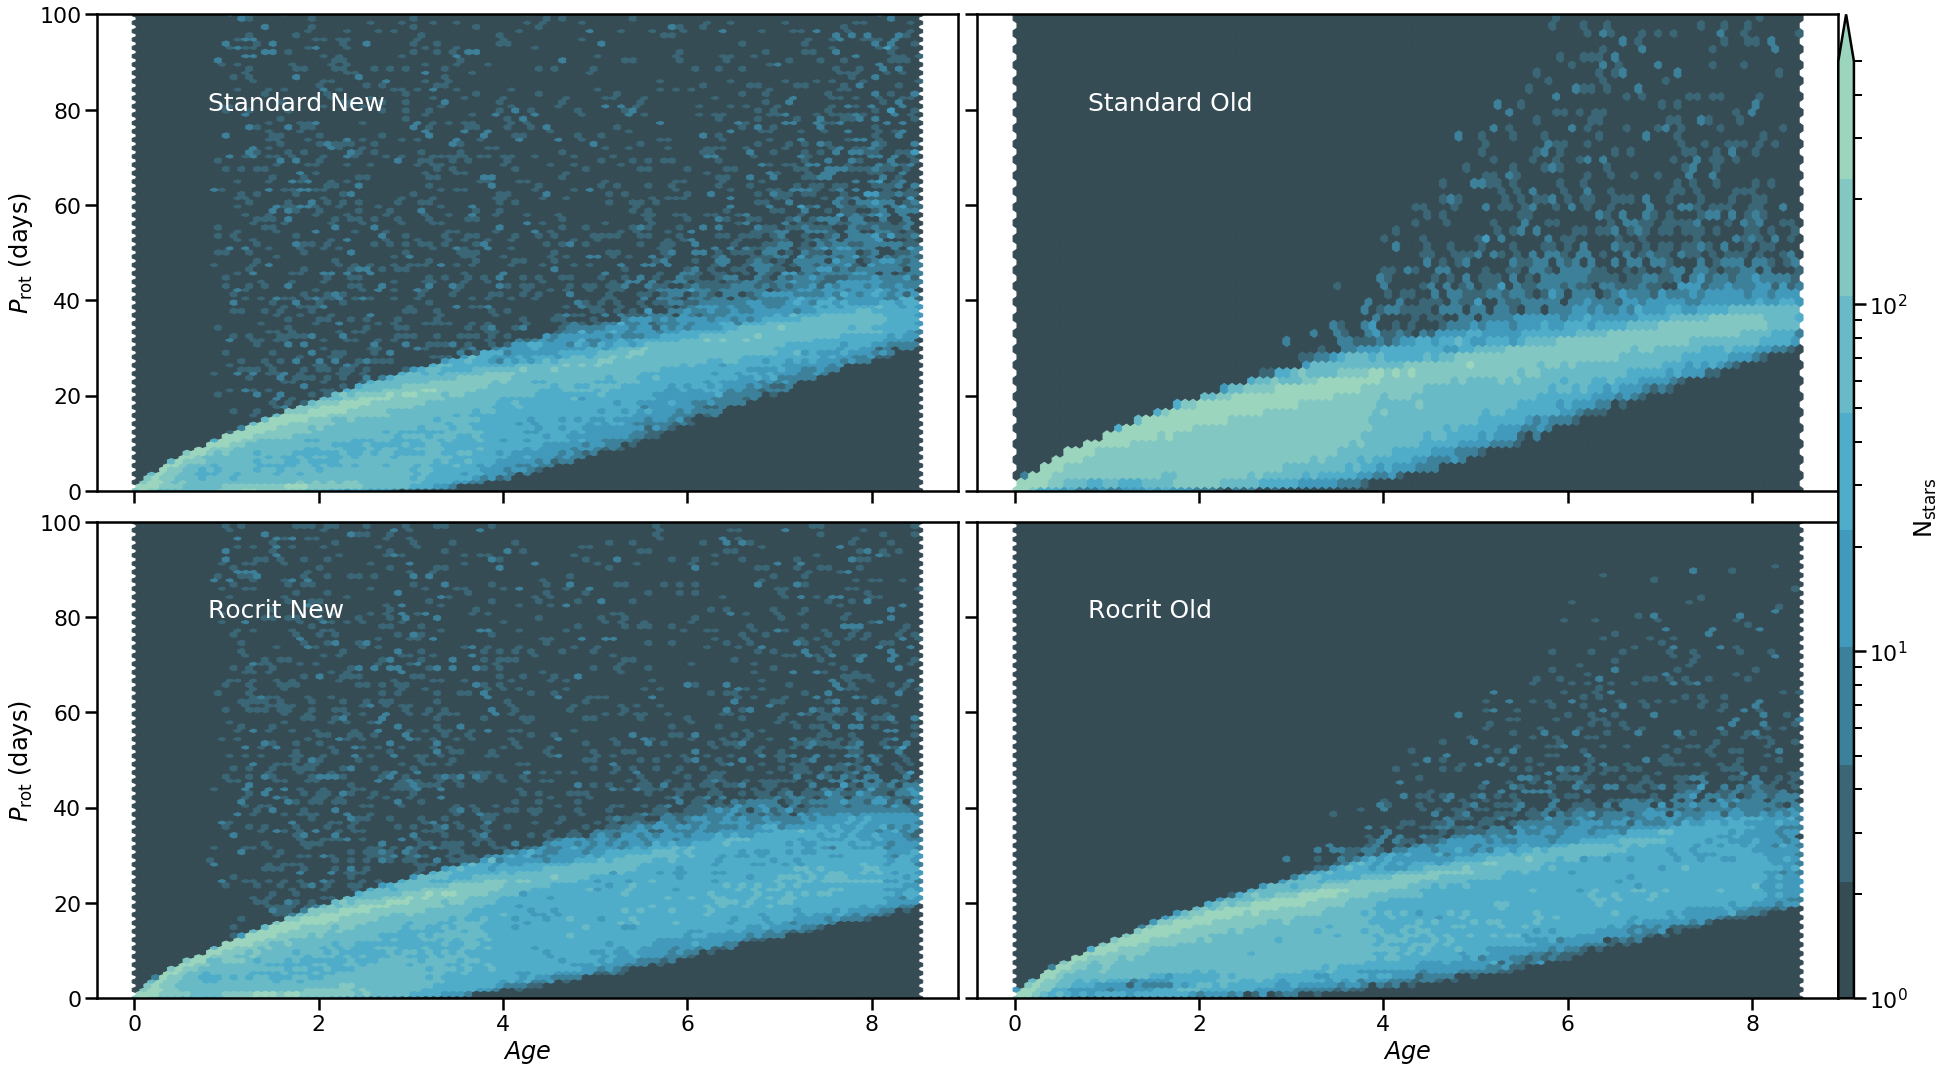

In [10]:
fig, axes = plt.subplots(2,2, figsize=(30,15), sharex=True, sharey=True)

axes[0,0].hexbin(stan.age, stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,0].text(0.8, 80, s='Standard New', c='w', fontsize=25)
axes[0,1].hexbin(old_stan.Age, old_stan.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[0,1].text(0.8, 80, s='Standard Old', c='w', fontsize=25)
axes[1,0].hexbin(ro.age, ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,0].text(0.8, 80, s='Rocrit New', c='w', fontsize=25)
c = axes[1,1].hexbin(old_ro.Age, old_ro.period, cmap=cmap, bins='log', vmin=1, vmax=500)
axes[1,1].text(0.8, 80, s='Rocrit Old', c='w', fontsize=25)

for ax in axes.ravel():
    ax.set_ylim(0, 100)

axes[0,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_ylabel(r'$P_{\rm rot}$ (days)')
axes[1,0].set_xlabel(r'$Age$')
axes[1,1].set_xlabel(r'$Age$')
fig.tight_layout()
fig.colorbar(c,ax=axes.ravel(), label=r'$\rm{N_{\rm stars}}$', pad=0,aspect=60, extend='max')
plt.show()

# Plot data over models

In [11]:
%%time
d = '/home/oliver/PhD/mnt/RDS/malatium/models/'
post_pa = []
for idx, kic in enumerate(kics):
    try:
        post_pa.append(pd.read_csv(f"{d}{int(kic)}_samples.csv")['P_A'])
    except FileNotFoundError:
        print(f'File not found for index {idx}')
        ati.drop(index=idx, inplace=True)
        continue               

File not found for index 0
File not found for index 1
File not found for index 2
File not found for index 3
File not found for index 4
File not found for index 5
File not found for index 6
File not found for index 7
File not found for index 8
File not found for index 9
File not found for index 10
File not found for index 11
File not found for index 12
File not found for index 13
File not found for index 14
File not found for index 15
File not found for index 16
File not found for index 17
File not found for index 18
File not found for index 19
File not found for index 20
File not found for index 21
File not found for index 22
File not found for index 23
File not found for index 24
File not found for index 25
File not found for index 26
File not found for index 27
File not found for index 28
File not found for index 29
File not found for index 30
File not found for index 31
File not found for index 32
File not found for index 33
File not found for index 34
File not found for index 35
Fi

KeyError: '[81] not found in axis'

In [12]:
bins = np.linspace(0, 1, 100)
hists = np.array([np.histogram(n, bins=bins, density=True)[0] for n in post_pa])

## Temperature cut

In [18]:
stan = stan[stan.Teff <= 6500]
ro = ro[ro.Teff <= 6500]

In [19]:
cols = ['Teff', 'period', 'age']
bound_s = [(stan[par].min(), stan[par].max()) for par in cols]
bound_ro = [(ro[par].min(), ro[par].max()) for par in cols]

### Membership

In [20]:
c1 = ati.copy(deep=True)
sel = []

cols = ['Teff', 'P', 'age', 'modmass']
for idx in c1.index:
    par = [c1.loc[idx][col] for col in cols]
    if not all(b[0] < v < b[1] for v, b in list(zip(par, bound_s))):
        c1.drop(index=idx, inplace=True)
        sel.append(False)
    elif not all(b[0] < v < b[1] for v, b in list(zip(par, bound_ro))):
        c1.drop(index=idx, inplace=True)
        sel.append(False)
    else:
        sel.append(True)
        pass

In [24]:
c1

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
82,8494142,6144,2.62,61.80,106,0.76,0.10,81.0,0.13,0.24,...,0.058829,4.473030,14.516515,9.885001,2.333946,5.543068,1.801705,NaN,0,0.000616
83,8554498,5945,5.60,61.98,60,0.96,0.05,76.0,0.17,0.42,...,0.051353,31.391260,35.712069,25.611323,0.716408,1.941401,1.625287,NaN,1,0.000506
84,8866102,6325,2.60,94.50,75,0.60,0.10,32.0,0.01,0.53,...,0.036641,0.154620,5.256433,0.152136,0.261764,12.778130,0.252761,NaN,0,0.001904
85,9592705,6174,2.33,53.54,92,0.32,0.10,21.0,0.22,0.16,...,0.052090,1.948601,10.733560,2.068692,0.808627,8.592304,0.799747,NaN,0,0.000416
86,10514430,5784,7.84,70.00,98,1.00,0.11,30.0,-0.11,0.91,...,0.043947,27.248588,53.555235,23.592684,0.325289,1.227331,0.369696,NaN,0,0.000698
87,10586004,5770,6.43,69.20,83,1.40,0.10,40.0,0.29,0.61,...,0.065079,6.543960,19.603187,11.082871,1.217564,3.498792,1.187324,NaN,0,0.000492
88,10666592,6350,2.11,59.22,80,0.59,0.08,110.0,0.26,0.24,...,0.063559,3.221729,9.450508,3.611131,0.920406,7.928996,0.942327,NaN,0,0.000668
89,11133306,5982,5.14,107.90,82,1.90,0.10,95.0,-0.02,0.88,...,0.070763,10.024896,24.628326,14.319218,0.698724,2.009262,0.726716,NaN,0,0.000719
90,11295426,5793,6.31,101.57,74,0.10,0.07,13.0,0.12,0.34,...,0.034581,14.539683,42.614984,11.500965,0.165275,1.203259,0.158763,NaN,0,0.000404
91,11401755,5911,7.10,67.90,66,1.20,0.06,44.0,-0.20,0.59,...,0.052362,4.348832,18.475557,4.689162,0.723918,3.951468,0.632003,NaN,2,0.000569


In [21]:
hists_sel = hists[sel]
sg = c1['hrclass'] == 'SG'
ms = c1['hrclass'] == 'MS'
h = c1['hrclass'] == 'H'
print(f'We have {len(c1[sg])} Sub-Giant stars.')
print(f'We have {len(c1[h])} Hot stars.')
print(f'We have {len(c1[ms])} Main-Sequence stars.')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 13

### Convergence

In [ ]:
c2 = c1.copy(deep=True)
sel = (c2.neff_split > 1000) & (c2.rhat_flag != 'rhat_1')
hists_sel_cov = hists_sel[sel]
sg = c2[sel]['hrclass'] == 'SG'
ms = c2[sel]['hrclass'] == 'MS'
h = c2[sel]['hrclass'] == 'H'
print(f'We have {len(c2[sel][sg])} Sub-Giant stars.')
print(f'We have {len(c2[sel][h])} Hot stars.')
print(f'We have {len(c2[sel][ms])} Main-Sequence stars.')

## Data plots

In [ ]:
sg = ati['hrclass'] == 'SG'
ms = ati['hrclass'] == 'MS'
h = ati['hrclass'] == 'H'

In [ ]:
fsel = ati['KIC'].isin(c2[sel]['KIC'])
f_post_pa = np.array(post_pa)[fsel]
fin = ati[fsel]
Ps = np.median(f_post_pa, axis=1)
exc = ati.loc[~ati['KIC'].isin(fin.KIC)]
feh = fin.loc[np.abs(fin.feh.values) > 0.4]
excfeh = exc.loc[np.abs(exc.feh.values) > 0.4]

In [ ]:
ati.P.max() + 10

In [ ]:
stan_p = stan[(stan.Teff < 6500) & (stan.Teff > 5000) & (stan.period < 65)]
ro_p = ro[(ro.Teff < 6500) & (ro.Teff > 5000) & (ro.period < 65)]

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,15), sharex=True, sharey=True)
# ax = plt.gca()
ax = axes[0]
ax.hexbin(stan_p.Teff, stan_p.period, cmap=cmap, bins='log', vmin=1, vmax=300)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

# Excluded
ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
# FeH
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')
ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(6500, 5000)
ax.set_ylabel(r'$P_{\rm rot}$ [days]')
# ax.set_xlabel(r'$T_{\rm eff} (K)$')
ax.set_title(r'Standard Model ($P_{\rm s} = 1$) ')
ax.legend(loc='upper left')

ax = axes[1]
c = ax.hexbin(ro_p.Teff, ro_p.period, cmap=cmap, bins='log', vmin=1, vmax=300)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')

ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(6500, 5000)
ax.set_ylabel(r'$P_{\rm rot}$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
ax.set_title(r'$R_{\rm o,crit}$ Model ($P_{\rm s} = 0$)')
# ax.legend(loc='upper left')

fig.tight_layout()
fig.colorbar(c, ax=axes.ravel(),label=r'$\rm{N_{\rm stars}}$', pad=0, aspect=60, extend='max')
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/fullsample.png', bbox_inches='tight', dpi=300)
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/fullsample.pdf', bbox_inches='tight', rasterized=True)
plt.show()